In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### 1. Load the Data (sql db)


In [11]:
con = sqlite3.connect("bmarket.db")

In [13]:
cursor = con.cursor()

        # Query the sqlite_master table to get table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        
        # Fetch all results
table_names = [row[0] for row in cursor.fetchall()]
print("Tables in the database:", table_names)

Tables in the database: ['bank_marketing']


In [14]:
query = "SELECT * FROM bank_marketing"
df = pd.read_sql_query(query, con)

con.close()

df.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


## 2. Initial Data Understanding

We first need to inspect the dataset, to gain a better understanding of what we are working with.

This includes:\
-Number of rows & columns\
-Column names & data types\
-Summary of the statistics using .describe()\
-Outliers/Data quality issues

In [16]:
df.columns

Index(['Client ID', 'Age', 'Occupation', 'Marital Status', 'Education Level',
       'Credit Default', 'Housing Loan', 'Personal Loan', 'Contact Method',
       'Campaign Calls', 'Previous Contact Days', 'Subscription Status'],
      dtype='object')

In [17]:
df.shape

(41188, 12)

By looking at the results from "df.describe(include='all').T", we immediately make a few observations:\
-1


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Client ID,41188.0,NaN,NaN,NaN,20594.5,11890.09578,1.0,10297.75,20594.5,30891.25,41188.0
Age,41188,77,150 years,4197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit Default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing Loan,16399,3,yes,8595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,37042,3,no,30532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact Method,41188,4,Cell,13100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign Calls,41188.0,NaN,NaN,NaN,2.051374,3.171345,-41.0,1.0,2.0,3.0,56.0


Insights from running .info()

There are several columns currently stored as the 'object' type, and need to be changed:\
    -Age\
    -Occupation\
    -Marital Status\
    -Education Levels\
    -Credit Default\
    -Housing Loan\
    -Personal Loan\
    -Contact Method\

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [23]:
df.isna().sum()

Client ID                    0
Age                          0
Occupation                   0
Marital Status               0
Education Level              0
Credit Default               0
Housing Loan             24789
Personal Loan             4146
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64

Check the target column for distribution

Insights\
There is a very high class imbalance, hence we need to consider SMOTE or UnderSampling when training our model.


Subscription Status
no     0.887346
yes    0.112654
Name: count, dtype: float64

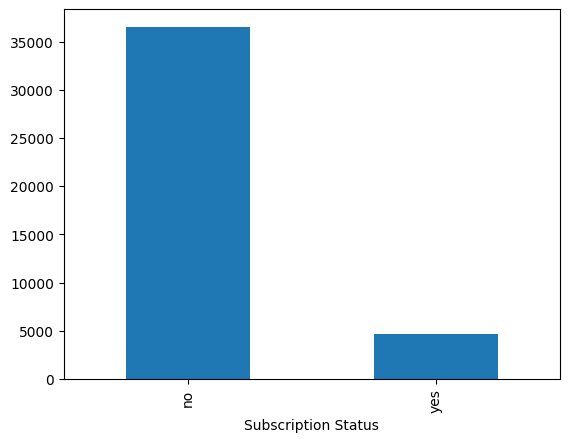

In [24]:
df['Subscription Status'].value_counts().plot(kind='bar')
df['Subscription Status'].value_counts()/df.shape[0]

#### (2a) Column by Column Data Understanding & Insights